In [1]:
from google.colab import drive
drive.mount('/content/drive')
#Mounting google drive

Mounted at /content/drive


In [2]:
%%capture
!pip install fastai==2.5.5
!pip install watermark
#installing the fastai library, which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results.

In [3]:
%load_ext watermark
#installing the watermark extension, which allows us to display version names and other information of libraries used.

In [4]:
%watermark -a "Bhavya Kohli, Joshi Tanmay Ajay, Sameep Chattopadhyay, Amruta Parulekar" -v -p numpy,pandas,fastai,torch

Author: Bhavya Kohli, Joshi Tanmay Ajay, Sameep Chattopadhyay, Amruta Parulekar

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

numpy : 1.21.6
pandas: 1.3.5
fastai: 2.5.5
torch : 1.10.2



In [5]:
from fastai.vision.all import *
import matplotlib.pyplot as plt

print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.__version__)
#Torch is a scientific computing framework with wide support for machine learning algorithms that puts GPUs first.
#The torch.cuda package adds support for CUDA tensor types, that implement the same function as CPU tensors, but they utilize GPUs for computation.

True
10.2
1.10.2+cu102


In [6]:
import numpy as np
import pandas as pd

# Exploratory Data Analysis

In [7]:
PROJECT_DIR = "/content/drive/Shareddrives/DS 303 Course Project/"
DATA_DIR = PROJECT_DIR + 'data/'

lookup = pd.read_csv(DATA_DIR + 'IdLookupTable.csv')
train_df = pd.read_csv(DATA_DIR + 'training.zip')
test_df = pd.read_csv(DATA_DIR + 'test.zip')

train_images_df = train_df['Image']
train_points_df = train_df.drop(columns=['Image'])
#Importing the dataset and making the test train split

In [8]:
train_points_df
#displaying the dataset

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,50.754202,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447


In [9]:
train_points_df.info()
#Printing information about the records and variables and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [10]:
train_points_df.describe()
#Printing the mean, min, max, median, 25th percentile, 75th percentile of the variables

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [11]:
#Printing the skews and variances of the variables 
print('SKEWS')
print(train_points_df.skew())
print('VARIANCES')
print(train_points_df.var())

SKEWS
left_eye_center_x           -2.642917
left_eye_center_y            1.003052
right_eye_center_x           0.838156
right_eye_center_y           1.531743
left_eye_inner_corner_x     -3.096097
left_eye_inner_corner_y      1.851659
left_eye_outer_corner_x     -2.347858
left_eye_outer_corner_y      0.523267
right_eye_inner_corner_x     0.472103
right_eye_inner_corner_y     2.165675
right_eye_outer_corner_x     0.941102
right_eye_outer_corner_y     1.130113
left_eyebrow_inner_end_x    -1.941288
left_eyebrow_inner_end_y     0.518967
left_eyebrow_outer_end_x    -2.401766
left_eyebrow_outer_end_y     0.228262
right_eyebrow_inner_end_x    0.214999
right_eyebrow_inner_end_y    0.850522
right_eyebrow_outer_end_x    1.302142
right_eyebrow_outer_end_y    0.512101
nose_tip_x                  -0.701981
nose_tip_y                  -0.444153
mouth_left_corner_x         -0.691676
mouth_left_corner_y          0.274861
mouth_right_corner_x         0.067450
mouth_right_corner_y         0.184946
mouth_

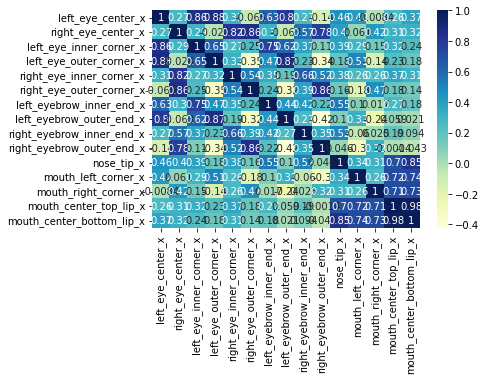

<Figure size 1600x1600 with 0 Axes>

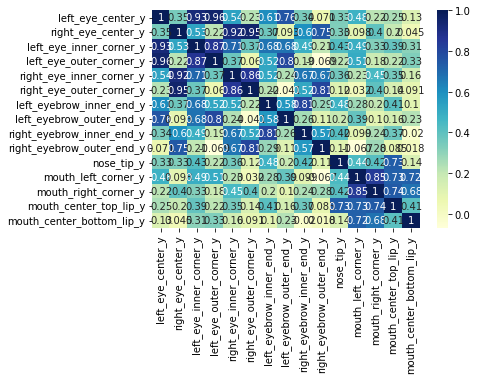

<Figure size 1600x1600 with 0 Axes>

In [12]:
import seaborn as sns
#plotting a heatmap for the x coordinates of the facial features
arr1 = ['left_eye_center_x','right_eye_center_x','left_eye_inner_corner_x','left_eye_outer_corner_x','right_eye_inner_corner_x','right_eye_outer_corner_x','left_eyebrow_inner_end_x','left_eyebrow_outer_end_x','right_eyebrow_inner_end_x','right_eyebrow_outer_end_x','nose_tip_x','mouth_left_corner_x','mouth_right_corner_x','mouth_center_top_lip_x','mouth_center_bottom_lip_x']
sns.heatmap(train_points_df[arr1].corr(), cmap="YlGnBu", annot=True)
from matplotlib.pyplot import figure
figure(figsize=(20,20), dpi=80)
plt.show()
#plotting a heatmap for the x coordinates of the facial features
arr2 =['left_eye_center_y','right_eye_center_y','left_eye_inner_corner_y','left_eye_outer_corner_y','right_eye_inner_corner_y','right_eye_outer_corner_y','left_eyebrow_inner_end_y','left_eyebrow_outer_end_y','right_eyebrow_inner_end_y','right_eyebrow_outer_end_y','nose_tip_y','mouth_left_corner_y','mouth_right_corner_y','mouth_center_top_lip_y','mouth_center_bottom_lip_y']
sns.heatmap(train_points_df[arr2].corr(), cmap="YlGnBu", annot=True)
from matplotlib.pyplot import figure
figure(figsize=(20,20), dpi=80)
plt.show()

In [13]:
mapping = {i: j for i,j in zip(range(30),train_points_df.columns)}
mapping

{0: 'left_eye_center_x',
 1: 'left_eye_center_y',
 2: 'right_eye_center_x',
 3: 'right_eye_center_y',
 4: 'left_eye_inner_corner_x',
 5: 'left_eye_inner_corner_y',
 6: 'left_eye_outer_corner_x',
 7: 'left_eye_outer_corner_y',
 8: 'right_eye_inner_corner_x',
 9: 'right_eye_inner_corner_y',
 10: 'right_eye_outer_corner_x',
 11: 'right_eye_outer_corner_y',
 12: 'left_eyebrow_inner_end_x',
 13: 'left_eyebrow_inner_end_y',
 14: 'left_eyebrow_outer_end_x',
 15: 'left_eyebrow_outer_end_y',
 16: 'right_eyebrow_inner_end_x',
 17: 'right_eyebrow_inner_end_y',
 18: 'right_eyebrow_outer_end_x',
 19: 'right_eyebrow_outer_end_y',
 20: 'nose_tip_x',
 21: 'nose_tip_y',
 22: 'mouth_left_corner_x',
 23: 'mouth_left_corner_y',
 24: 'mouth_right_corner_x',
 25: 'mouth_right_corner_y',
 26: 'mouth_center_top_lip_x',
 27: 'mouth_center_top_lip_y',
 28: 'mouth_center_bottom_lip_x',
 29: 'mouth_center_bottom_lip_y'}

In [14]:
train_images_df[0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

The images are stored as strings of numbers separated by a single space (' '), so we can use the `np.fromstring` function to convert it to an array then reshape it into its original size, which is (96,96)

In [15]:
import tqdm.notebook as tq  # For nice progress bars

train_images = [np.fromstring(train_images_df.iloc[i], sep=' ').reshape(96,96) for i in tq.trange(train_images_df.size)]
train_points_1d = [train_points_df.iloc[i].values for i in tq.trange(train_points_df.shape[0])]
train_points = [train_points_df.iloc[i].values.reshape(15,2) for i in tq.trange(train_points_df.shape[0])]

  0%|          | 0/7049 [00:00<?, ?it/s]

  0%|          | 0/7049 [00:00<?, ?it/s]

  0%|          | 0/7049 [00:00<?, ?it/s]

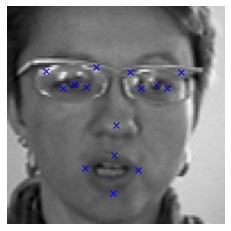

In [16]:
# Visualizing a sample, face and features from the training data
plt.imshow(train_images[10], cmap='gray')
plt.plot(train_points[10][:,0], train_points[10][:,1], 'bx')
plt.axis('off')
plt.show()

In [17]:
def show_image_and_points(img, true_points=None, pred_points=None):
    ax = plt.imshow(img, cmap='gray')
    if true_points is not None:
        plt.plot(true_points[:,0], true_points[:,1], 'bx')
    if pred_points is not None:
        plt.plot(pred_points[:,0], pred_points[:,1], 'rx')
    plt.axis('off')
    plt.show()
def show_test(i):
    pred,_,_ = learner.predict(test_images[i])
    show_image_and_points(test_images[i], pred_points=pred)
def show_train(i, learner=None):
    fully_decoded = None
    if learner is not None:
        fully_decoded, loss_func_decoded, probabilities = learner.predict(train_images[i])
    show_image_and_points(train_images[i], true_points=train_points[i], pred_points=fully_decoded)

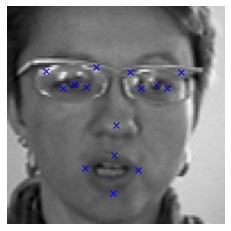

In [18]:
# Testing the function defined above
show_train(10)

# Applying augmentations to the dataset

In [19]:
def augment(img, points, rot_deg, zoom, x_shift_px, y_shift_px):
    size = img.shape[-2:]
    def get_rotation(x):
        size_ = x.new_ones(x.shape[0])
        rot_rad = torch.ones_like(size_)*(rot_deg / 180.0 * np.pi)
        m11 = rot_rad.cos() / zoom
        m12 = rot_rad.sin() / zoom
        t0 = torch.ones_like(size_)*(x_shift_px/48.0)
        t1 = torch.ones_like(size_)*(y_shift_px/48.0)
        return affine_mat(m11, m12, t0, -m12, m11, t1)
    t1 = AffineCoordTfm(aff_fs=get_rotation, size=size)
    p1 = Pipeline(funcs=t1)
    x = TensorImage(img).view([1,1,96,96])
    y = TensorPoint(points, img_size=[96,96]).view([1,15,2])
    x,y = p1((x,y/48.0-1.0))
    y = y.view([15,2])
    coord_ok = (y[:,0] > -1.0) & (y[:,0] < 1.0) & (y[:,1] > -1.0) & (y[:,1] < 1.0)
    coord_ok = torch.stack([coord_ok, coord_ok], dim=1)
    y = y.where(coord_ok, tensor(np.nan))
    y = y*48.0+48.0
    return np.array(x.view([96,96])), np.array(y)

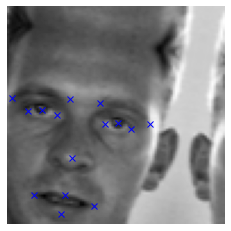

In [20]:
# Testing the augmentation function
aug_img, aug_points = augment(train_images[2], train_points[2], 10.0, 1.0, 16.0, -16.0)
show_image_and_points(aug_img, true_points=aug_points)

In [21]:
augs = []
one_pixel = 2.0/96.0
for dx in range(21):
    for dy in range(21):
        if dx==10 and dy==10:
            continue
        augs.append([0.0, 1.0, dx-10.0, dy-10.0])
for rot_deg in range(21):
    if rot_deg==10:
        continue
    augs.append([rot_deg-10, 1.0, 0.0, 0.0])
for scale in range(21):
    if scale==10:
        continue
    augs.append([0.0, 0.9 + 0.01*scale, 0.0, 0.0])
print(len(augs))

480


In [22]:
aug_images = []
aug_points = []
aug_ind = 0
for idx in tq.trange(len(train_images)):
    img, point = augment(train_images[idx], train_points[idx], *augs[aug_ind])
    aug_images.append(train_images[idx])
    aug_points.append(train_points[idx])
    aug_images.append(img)
    aug_points.append(point)
    aug_ind = (aug_ind + 1) % len(augs)
print(len(aug_images))

  0%|          | 0/7049 [00:00<?, ?it/s]

14098


In [23]:
train_images = aug_images
train_points = aug_points

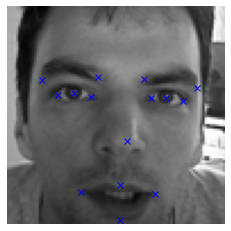

In [24]:
# Unaugmented image
show_train(10)

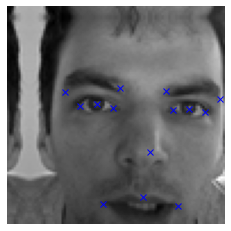

In [25]:
# Augmented image
show_train(11)

# Defining the learner model using the cnn_learner method in `fastai` 

In [26]:
# Defining the loss function class
class MyBaseLoss():
    "Same as my `loss_cls`, but flattens input and target."
    activation=decodes=noops
    def __init__(self, loss_cls, *args, axis=-1, flatten=True, floatify=False, is_2d=True, **kwargs):
        store_attr("axis,flatten,floatify,is_2d")
        self.func = loss_cls(*args,**kwargs)
        functools.update_wrapper(self, self.func)

    def __repr__(self): return f"MyFlattenedLoss of {self.func}"
    @property
    def reduction(self): return self.func.reduction
    @reduction.setter
    def reduction(self, v): self.func.reduction = v

    def _contiguous(self,x):
        return TensorBase(x.transpose(self.axis,-1).contiguous()) if isinstance(x,torch.Tensor) else x

    def __call__(self, inp, targ, **kwargs):
        inp,targ  = map(self._contiguous, (inp,targ))
        if self.floatify and targ.dtype!=torch.float16: targ = targ.float()
        if targ.dtype in [torch.int8, torch.int16, torch.int32]: targ = targ.long()
        if self.flatten: inp = inp.view(-1,inp.shape[-1]) if self.is_2d else inp.view(-1)
        tmptarg2 = targ.view(inp.shape)
        tmptarg3 = torch.where(torch.isnan(tmptarg2), inp, tmptarg2)
        tmptarg4 = tmptarg3.view(-1) if self.flatten else tmptarg3
        return self.func.__call__(inp, tmptarg4, **kwargs)

In [27]:
@use_kwargs_dict(reduction='mean')
def MyMSELossFlat(*args, axis=-1, floatify=True, **kwargs):
    "Same as MY `nn.MSELoss`, but flattens input and target."
    return MyBaseLoss(nn.MSELoss, *args, axis=axis, floatify=floatify, is_2d=False, **kwargs)

In [28]:
def MySplitter(valid_pcts=0.2):
    def _inner(item_range):
        cut = int(len(item_range) * (1.0-valid_pcts))
        mylist = list(item_range)
        l1 = mylist[:cut]
        l2 = mylist[cut:]
        return L(l1), L(l2)
    return _inner

In [29]:
def get_x(ind):
    return train_images[ind]
def get_y(ind):
    return train_points[ind]
def get_items(i): return i
db = DataBlock(blocks=[ImageBlock, PointBlock],
               get_items=get_items,
               get_x=get_x, get_y=get_y,
               item_tfms=Resize([96,96]),
               splitter=MySplitter(0.2),
               batch_tfms=aug_transforms(size=[96,96],
                                         mult=1.0, max_rotate=8.0, 
                                         flip_vert=False,       # Flips set to false since directions (left/right) are sensitive
                                         do_flip=False,         # Same as above
                                         pad_mode='border', 
                                         max_zoom=1.0, min_zoom=0.9, max_lighting=0.1, max_warp=0.0)
              )

In [30]:
db.summary(range(len(train_images)))

Setting-up type transforms pipelines
Found 14098 items
2 datasets of sizes 11278,2820
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> TensorPoint.create

Building one sample
  Pipeline: get_x -> PILBase.create
    starting from
      0
    applying get_x gives
      [[238. 236. 237. ... 250. 250. 250.]
 [235. 238. 236. ... 249. 250. 251.]
 [237. 236. 237. ... 251. 251. 250.]
 ...
 [186. 183. 181. ...  52.  57.  60.]
 [189. 188. 207. ...  61.  69.  78.]
 [191. 184. 184. ...  70.  75.  90.]]
    applying PILBase.create gives
      PILImage mode=F size=96x96
  Pipeline: get_y -> TensorPoint.create
    starting from
      0
    applying get_y gives
      [[66.03356391 39.00227368]
 [30.22700752 36.4216782 ]
 [59.58207519 39.64742256]
 [73.13034586 39.96999699]
 [36.35657143 37.3894015 ]
 [23.45287218 37.3894015 ]
 [56.95326316 29.03364812]
 [80.22712782 32.22813835]
 [40.22760902 29.0023218 ]
 [16.35637895 29.64747068]
 [44.42057143 57.06680301]
 [61.19530827 79.

In [31]:
dls = db.dataloaders(range(len(train_images)), bs=64)
dls.train_ds.loss_func = MyMSELossFlat()

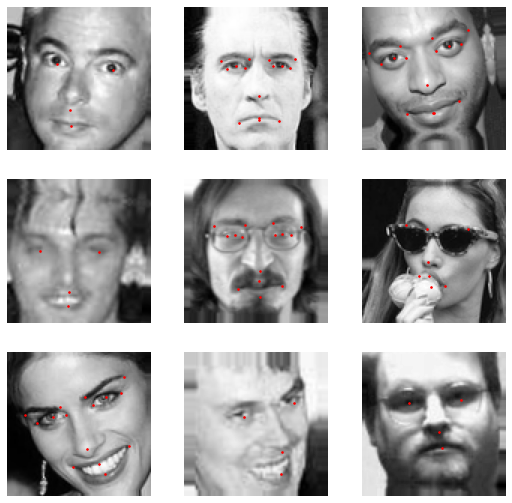

In [32]:
dls.show_batch(cmap='gray', unique=False)

In [ ]:
learner = cnn_learner(dls, resnet18)

In [ ]:
learner.summary()

In [ ]:
learner.model

In [ ]:
learner.lr_find()

In [ ]:
print('Fitting model using lr = 1e-3')
learner.fit_one_cycle(15, lr_max=1e-3)

In [ ]:
learner.recorder.plot_loss()

In [ ]:
# Visualizing a few images along with the model predictions
learner.show_results(ds_idx=0, shuffle=True, nrows=2, ncols=2)

In [ ]:
learner.fine_tune(100)

In [ ]:
learner.export(PROJECT_DIR + 'models/model.pkl')

In [ ]:
learner.save(PROJECT_DIR + 'models/model_save')

In [ ]:
learner.recorder.plot_loss()

# LFW Dataset


In [35]:
%%capture
!tar zxvf "/content/drive/Shareddrives/DS 303 Course Project/data/lfw.tgz"

In [33]:
import math
def Compare(arr_points_1,arr_points_2,normtype):
    """ 
  Gets the deviation between two images in the form of the norm between the L2 norms of each feature point on the image.

  Args:
    arr_poimts_1 (np.ndarray): Feature points of first image
    arr_points_2 (np.ndarray): Feature points of second image
    normtype(int): parameter for selecting either L1 norm or L2 norm of L-infinity norm for all L2 norms of feature points

  Returns:
    The final computed norm which quantifies the deviation between two images

  """
    pointset1 = arr_points_1.reshape(13,2)
    pointset2 = arr_points_2.reshape(13,2)
    normset1 = []
    normset2 = []
    for i in range(13):
      for j in range(i,13):
        if(j != i):
          norm1 = ((pointset1[i][0] - pointset1[j][0])**2 + (pointset1[i][1] - pointset1[j][1])**2)**0.5
          normset1.append(norm1)
          norm2 = ((pointset2[i][0] - pointset2[j][0])**2 + (pointset2[i][1] - pointset2[j][1])**2)**0.5
          normset2.append(norm2)
    total_norms = len(normset1)
    if(normtype == 0):
      L_2_norm = 0
      for i in range(total_norms):
        L_2_norm += (normset1[i] - normset2[i])**2
      L_2_norm = L_2_norm**0.5
      norm = L_2_norm

    elif (normtype == 1):
      L_1_norm = 0
      for i in range(total_norms):
        L_1_norm += np.abs(normset1[i] - normset2[i])
      norm = L_1_norm  

    elif (normtype == 2):
      L_inf_norm = []
      for i in range(total_norms):
        L_inf_norm.append(np.abs(normset1[i] - normset2[i]))
      norm = L_inf_norm  

    return norm

In [36]:
import sys
sys.path.append(PROJECT_DIR)
from utils import *

In [37]:
face_mapping = {i: j for i,j in zip(range(10000),os.listdir('/content/lfw'))}
face_inverse = {j: i for i,j in zip(range(10000),os.listdir('/content/lfw'))}
num_faces = [[x[0].split('/')[-1],len(x[2])] for x in os.walk('/content/lfw')][1:]
multiple_faces = [n for n,num in enumerate(num_faces) if num[1]>=2]
single_faces = [n for n,num in enumerate(num_faces) if num[1]==1]
all_image_paths = glob.glob('/content/lfw/*/*.jpg')

In [38]:
all_image_paths = list(np.random.choice(all_image_paths, 2569, replace=False))

In [39]:
def exception(image):
    im = io.imread(image)
    d = face_detector(im,1)
    fr = [(x.left(),x.top(),x.right(),x.bottom()) for x in d]
    for n,r in enumerate(fr):
        face = 1
    return face

In [40]:
face_detector = dlib.get_frontal_face_detector()
for image in tq.tqdm(all_image_paths):
    try:
        exception(image)
#This removes images where no face was detected at all
    except:
        all_image_paths.remove(image)
        print(f"Removed {image}")

  0%|          | 0/2569 [00:00<?, ?it/s]

Removed /content/lfw/Robert_Zoellick/Robert_Zoellick_0005.jpg
Removed /content/lfw/Rob_Moore/Rob_Moore_0001.jpg
Removed /content/lfw/Lynne_Thigpen/Lynne_Thigpen_0001.jpg
Removed /content/lfw/Don_Hewitt/Don_Hewitt_0001.jpg
Removed /content/lfw/Beth_Jones/Beth_Jones_0002.jpg
Removed /content/lfw/Jessica_Lynch/Jessica_Lynch_0001.jpg
Removed /content/lfw/Ricardo_Lagos/Ricardo_Lagos_0004.jpg
Removed /content/lfw/Jaouad_Gharib/Jaouad_Gharib_0001.jpg
Removed /content/lfw/Narendra_Modi/Narendra_Modi_0001.jpg
Removed /content/lfw/Elisabeth_Schumacher/Elisabeth_Schumacher_0001.jpg
Removed /content/lfw/Gary_Bald/Gary_Bald_0001.jpg
Removed /content/lfw/Sean_Patrick_OMalley/Sean_Patrick_OMalley_0003.jpg
Removed /content/lfw/Nabil_Shaath/Nabil_Shaath_0002.jpg


In [42]:
np.random.seed(420)
np.random.shuffle(all_image_paths)

train_, test_ = train_test_split(all_image_paths,test_size=0.2,random_state=69)

In [43]:
train_dict = get_dict_from_ids(train_)
test_dict = get_dict_from_ids(test_)

In [44]:
train_multi_dict = separate_multi(train_dict)

In [45]:
learner = load_learner(PROJECT_DIR + 'models/model.pkl')
train_multi_pts_dict = get_points_from_dict(train_multi_dict,learner)

  0%|          | 0/267 [00:00<?, ?it/s]

In [46]:
import pickle
with open(PROJECT_DIR + 'train_multi_points.pkl', 'wb') as handle:
    pickle.dump(train_multi_pts_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# maxnorms1 = []
maxnorms2 = []
lnet = 0
# maxnormsinf = []
for key in tq.tqdm(train_multi_pts_dict.keys()):
    arr_images = train_multi_pts_dict[key]
    l = len(arr_images)
    # normsnew1 = []
    normsnew2 = []
    # normsnewinf = []
    for i in range (l):
        for j in range (l):
            if(i > j):
                # normsnew1.append(Compare(arr_images[i],arr_images[j],1))
                normsnew2.append(l*Compare(arr_images[i],arr_images[j],0))
                #lnet += l
                # normsnewinf.append(Compare(arr_images[i],arr_images[j],2))
    # maxnorms1.append(max(normsnew1))
    maxnorms2.append(max(normsnew2))
    lnet += l
    # maxnormsinf.append(max(normsnewinf))
#norm1 = max(maxnorms1)
norm2 = max(maxnorms2)/lnet
# norminf = max(maxnormsinf)




  0%|          | 0/267 [00:00<?, ?it/s]

In [134]:
THRESHOLD = norm2

In [100]:
def checkface(index1,index2):
#This function checks if the two images corresponding to index1, index2 in the test dataset are having norms less than threshold or not, and 
#gives an output 0 if they don't match, 1 if they do.    
    im1, im2 = io.imread(test_[index1]), io.imread(test_[index2])
    pts1, pts2 = learner.predict(im1)[0][:-2], learner.predict(im2)[0][:-2]

    normcomp = float(Compare(pts1,pts2,0))
    print(normcomp)
    if normcomp >= float(THRESHOLD):
        return 0
    else:
        return 1    

In [107]:
checkface(81,89)

39.392765045166016


1

In [142]:
num_samples = 1000
def accuracy_score(test_,learner=learner,num_samples=1000):
    #np.random.seed(1)
    norms = []
    trues = []
    preds = []
    correct = 0
    for samp in tq.trange(num_samples):
        [im1,im2] = np.random.choice(test_,2,replace=False)
        n1,n2 = im1.split('/')[3],im2.split('/')[3]
        if n1==n2: true = 1
        else: true = 0
        
        pt1,pt2 = learner.predict(im1)[0][:-2],learner.predict(im2)[0][:-2]
        norm_ = Compare(pt1,pt2,0)
        norms.append(norm_)
        if norm_ < THRESHOLD: pred = 1
        else: pred = 0
        if true == pred: correct += 1
        trues.append(true); preds.append(pred)
    accuracy = (correct/num_samples)*100
    print(f"Accuracy = {accuracy}%")

In [139]:
THRESHOLD

TensorPoint(10.4949)

In [143]:
accuracy_score(test_,learner,1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Accuracy = 99.8%
